<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


#### Add your code below following the instructions given in the course


1. Importing the required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

2. Loading the data into the data frame.

In [4]:
df = pd.read_csv("heart.csv")
# To display the top 5 rows 
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail(5)                        # To display the botton 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


3. Checking the types of data

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

4. Dropping irrelevant columns

In [7]:
df = df.drop(['trestbps', 'fbs', 'target'], axis=1)
df.head(5)

,age,sex,cp,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,233,0,150,0,2.3,0,0,1
1,37,1,2,250,1,187,0,3.5,0,0,2
2,41,0,1,204,0,172,0,1.4,2,0,2
3,56,1,1,236,1,178,0,0.8,2,0,2
4,57,0,0,354,1,163,1,0.6,2,0,2


5. Renaming the columns

In [8]:
df = df.rename(columns={"cp": "number"})
df.head(5)

,age,sex,number,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,233,0,150,0,2.3,0,0,1
1,37,1,2,250,1,187,0,3.5,0,0,2
2,41,0,1,204,0,172,0,1.4,2,0,2
3,56,1,1,236,1,178,0,0.8,2,0,2
4,57,0,0,354,1,163,1,0.6,2,0,2


6. Dropping the duplicate rows

In [9]:
df.shape

(303, 11)

In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1, 11)


In [11]:
df.count()      # Used to count the number of rows

age        303
sex        303
number     303
chol       303
restecg    303
thalach    303
exang      303
oldpeak    303
slope      303
ca         303
thal       303
dtype: int64

In [12]:
df = df.drop_duplicates()
df.head(5)

,age,sex,number,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,233,0,150,0,2.3,0,0,1
1,37,1,2,250,1,187,0,3.5,0,0,2
2,41,0,1,204,0,172,0,1.4,2,0,2
3,56,1,1,236,1,178,0,0.8,2,0,2
4,57,0,0,354,1,163,1,0.6,2,0,2


In [13]:
df.count()

age        302
sex        302
number     302
chol       302
restecg    302
thalach    302
exang      302
oldpeak    302
slope      302
ca         302
thal       302
dtype: int64

7. Dropping the missing or null values.

In [15]:
print(df.isnull().sum())

age        0
sex        0
number     0
chol       0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
dtype: int64


In [16]:
df = df.dropna()    # Dropping the missing values.
df.count()

age        302
sex        302
number     302
chol       302
restecg    302
thalach    302
exang      302
oldpeak    302
slope      302
ca         302
thal       302
dtype: int64

8. Detecting Outliers

<AxesSubplot:xlabel='age'>

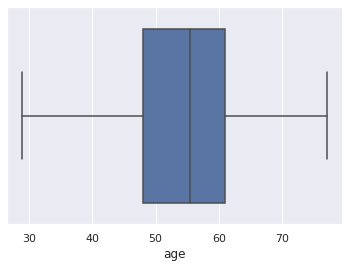

In [17]:
sns.boxplot(x=df['age'])

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age        13.00
sex         1.00
number      2.00
chol       63.75
restecg     1.00
thalach    32.75
exang       1.00
oldpeak     1.60
slope       1.00
ca          1.00
thal        1.00
dtype: float64


In [19]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(269, 11)

9. Plot different features against one another (scatter), against frequency (histogram)

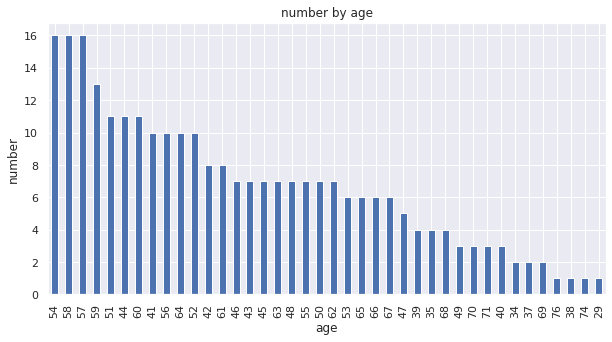

In [24]:
df.age.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("number by age")
plt.ylabel('number')
plt.xlabel('age');

,age,sex,number,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.085872,-0.041695,0.142895,-0.086093,-0.391660,0.112104,0.190408,-0.146673,0.376113,0.073098
sex,-0.085872,1.000000,-0.061325,-0.153906,-0.108494,-0.038887,0.126378,0.139868,-0.036613,0.072744,0.245994
number,-0.041695,-0.061325,1.000000,-0.052640,0.045768,0.276777,-0.383717,-0.127675,0.090289,-0.215903,-0.175287
chol,0.142895,-0.153906,-0.052640,1.000000,-0.102510,-0.004884,0.076779,-0.003735,0.044688,0.081847,0.074438
restecg,-0.086093,-0.108494,0.045768,-0.102510,1.000000,0.046725,-0.067530,-0.077207,0.117396,-0.092555,0.040403
thalach,-0.391660,-0.038887,0.276777,-0.004884,0.046725,1.000000,-0.418727,-0.351697,0.380027,-0.231850,-0.122042
exang,0.112104,0.126378,-0.383717,0.076779,-0.067530,-0.418727,1.000000,0.353784,-0.281205,0.184332,0.245318
oldpeak,0.190408,0.139868,-0.127675,-0.003735,-0.077207,-0.351697,0.353784,1.000000,-0.539449,0.281125,0.183537
slope,-0.146673,-0.036613,0.090289,0.044688,0.117396,0.380027,-0.281205,-0.539449,1.000000,-0.067347,-0.079214
ca,0.376113,0.072744,-0.215903,0.081847,-0.092555,-0.231850,0.184332,0.281125,-0.067347,1.000000,0.137251


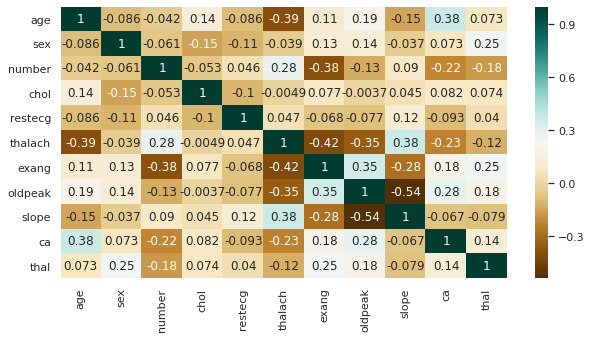

In [25]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

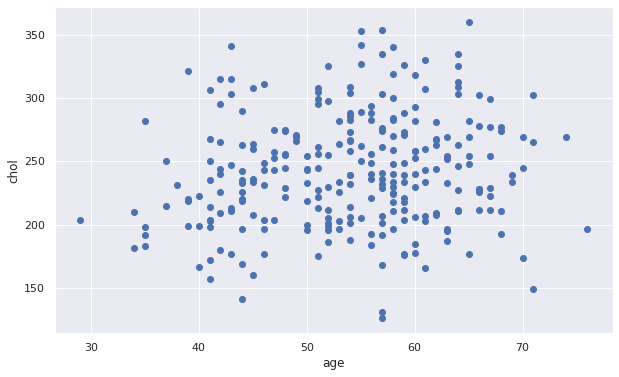

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['age'], df['chol'])
ax.set_xlabel('age')
ax.set_ylabel('chol')
plt.show()